## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = datasets.load_boston()
train_x , test_x , train_y , test_y = train_test_split(df.data , df.target  , test_size = 0.2)
DTR = DecisionTreeRegressor()
DTR.fit(train_x , train_y)
pred_y = DTR.predict(test_x)


In [3]:
mse = metrics.mean_squared_error(test_y,pred_y)
print(f' MSE = {mse}\n')

 MSE = 22.596372549019605



In [4]:
import pandas as pd 
index = df.feature_names
value = DTR.feature_importances_
pd.DataFrame(data = value , index = index , columns = ['feature_importances_'])

,feature_importances_
CRIM,0.065259
ZN,0.000929
INDUS,0.004123
CHAS,0.000504
NOX,0.011029
RM,0.578666
AGE,0.014050
DIS,0.085695
RAD,0.000500
TAX,0.011396


Text(0, 0.5, 'MSE')

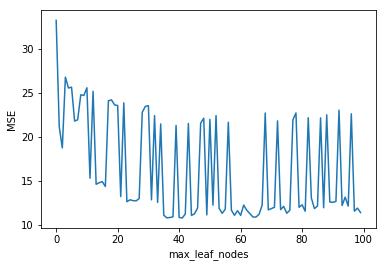

In [8]:
# try different leaf_nodes
import numpy as np
import matplotlib.pyplot as plt

mse = []
for i in np.arange(100):
    dtr = DecisionTreeRegressor(max_leaf_nodes=i+2)
    dtr.fit(train_x,train_y)
    pred_y = dtr.predict(test_x)
    metrics.mean_squared_error(test_y,pred_y)
    mse.append(metrics.mean_squared_error(test_y,pred_y))
plt.plot(mse)
plt.xlabel('max_leaf_nodes')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

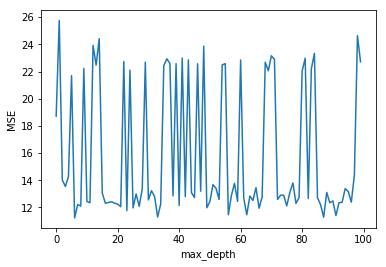

In [6]:
# try different max_depth
mse = []
for i in np.arange(100):
    dtr = DecisionTreeRegressor(max_depth=i+2)
    dtr.fit(train_x,train_y)
    pred_y = dtr.predict(test_x)
    metrics.mean_squared_error(test_y,pred_y)
    mse.append(metrics.mean_squared_error(test_y,pred_y))
plt.plot(mse)
plt.xlabel('max_depth')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

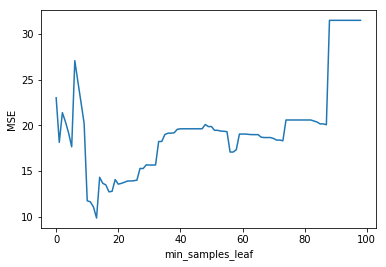

In [7]:
# try different min_samples_leaf
mse = []
for i in np.arange(1,100):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    dtr.fit(train_x,train_y)
    pred_y = dtr.predict(test_x)
    metrics.mean_squared_error(test_y,pred_y)
    mse.append(metrics.mean_squared_error(test_y,pred_y))
plt.plot(mse)
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')